In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
dataset = pd.read_csv('dataset_malwares.csv')

In [3]:

from sklearn.model_selection import train_test_split

In [4]:
dataset.keys()

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [5]:
X = dataset.drop(['Name','Malware'], axis=1)
y = dataset['Malware']

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=101)
X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
11441,23117,144,3,0,4,0,65535,0,184,0,...,3791650912,0,17,22,0,409626,422944,81920,77824,0
2624,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,1,135,0,0,113332,131072,0,0
18874,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,15,347,4,111632,132520,139264,0,0
16415,23117,144,3,0,4,0,65535,0,184,0,...,3221225600,0,7,159,0,0,29736,241664,0,117181216
11179,23117,144,3,0,4,0,65535,0,184,0,...,3221225536,0,4,88,0,0,222988,241664,0,719360


In [6]:
dataset.drop(['Name','Malware'], axis=1).values

array([[2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 7.78240e+04,
        7.37280e+04, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 2.94912e+05,
        0.00000e+00, 3.46112e+05],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 4.09600e+04,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.31170e+04, 0.00000e+00, 0.00000e+00, ..., 6.14400e+04,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 1.02400e+05,
        0.00000e+00, 0.00000e+00],
       [2.31170e+04, 1.44000e+02, 3.00000e+00, ..., 5.57056e+05,
        0.00000e+00, 0.00000e+00]])

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [8]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,1.076024,0.0,1.379922,-0.623512,-0.087645,0.000436,-0.000677,-0.067061,-0.019125,-0.040622
1,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.656755,0.249356,-0.087645,-0.016366,-0.059942,-0.060538,-0.020494,-0.040622
2,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,1.125337,1.886949,-0.063126,-0.011787,-0.056269,-0.059451,-0.020494,-0.040622
3,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,0.106999,0.434744,-0.087645,-0.016366,-0.075943,-0.045862,-0.020494,5.561297
4,0.0,-0.038591,-0.050297,-0.041557,-0.040212,-0.042419,0.148298,-0.016139,-0.036843,-0.031918,...,0.097299,0.0,-0.274878,-0.113695,-0.087645,-0.016366,-0.038952,-0.045862,-0.020494,-0.006233


In [9]:
import seaborn as sns

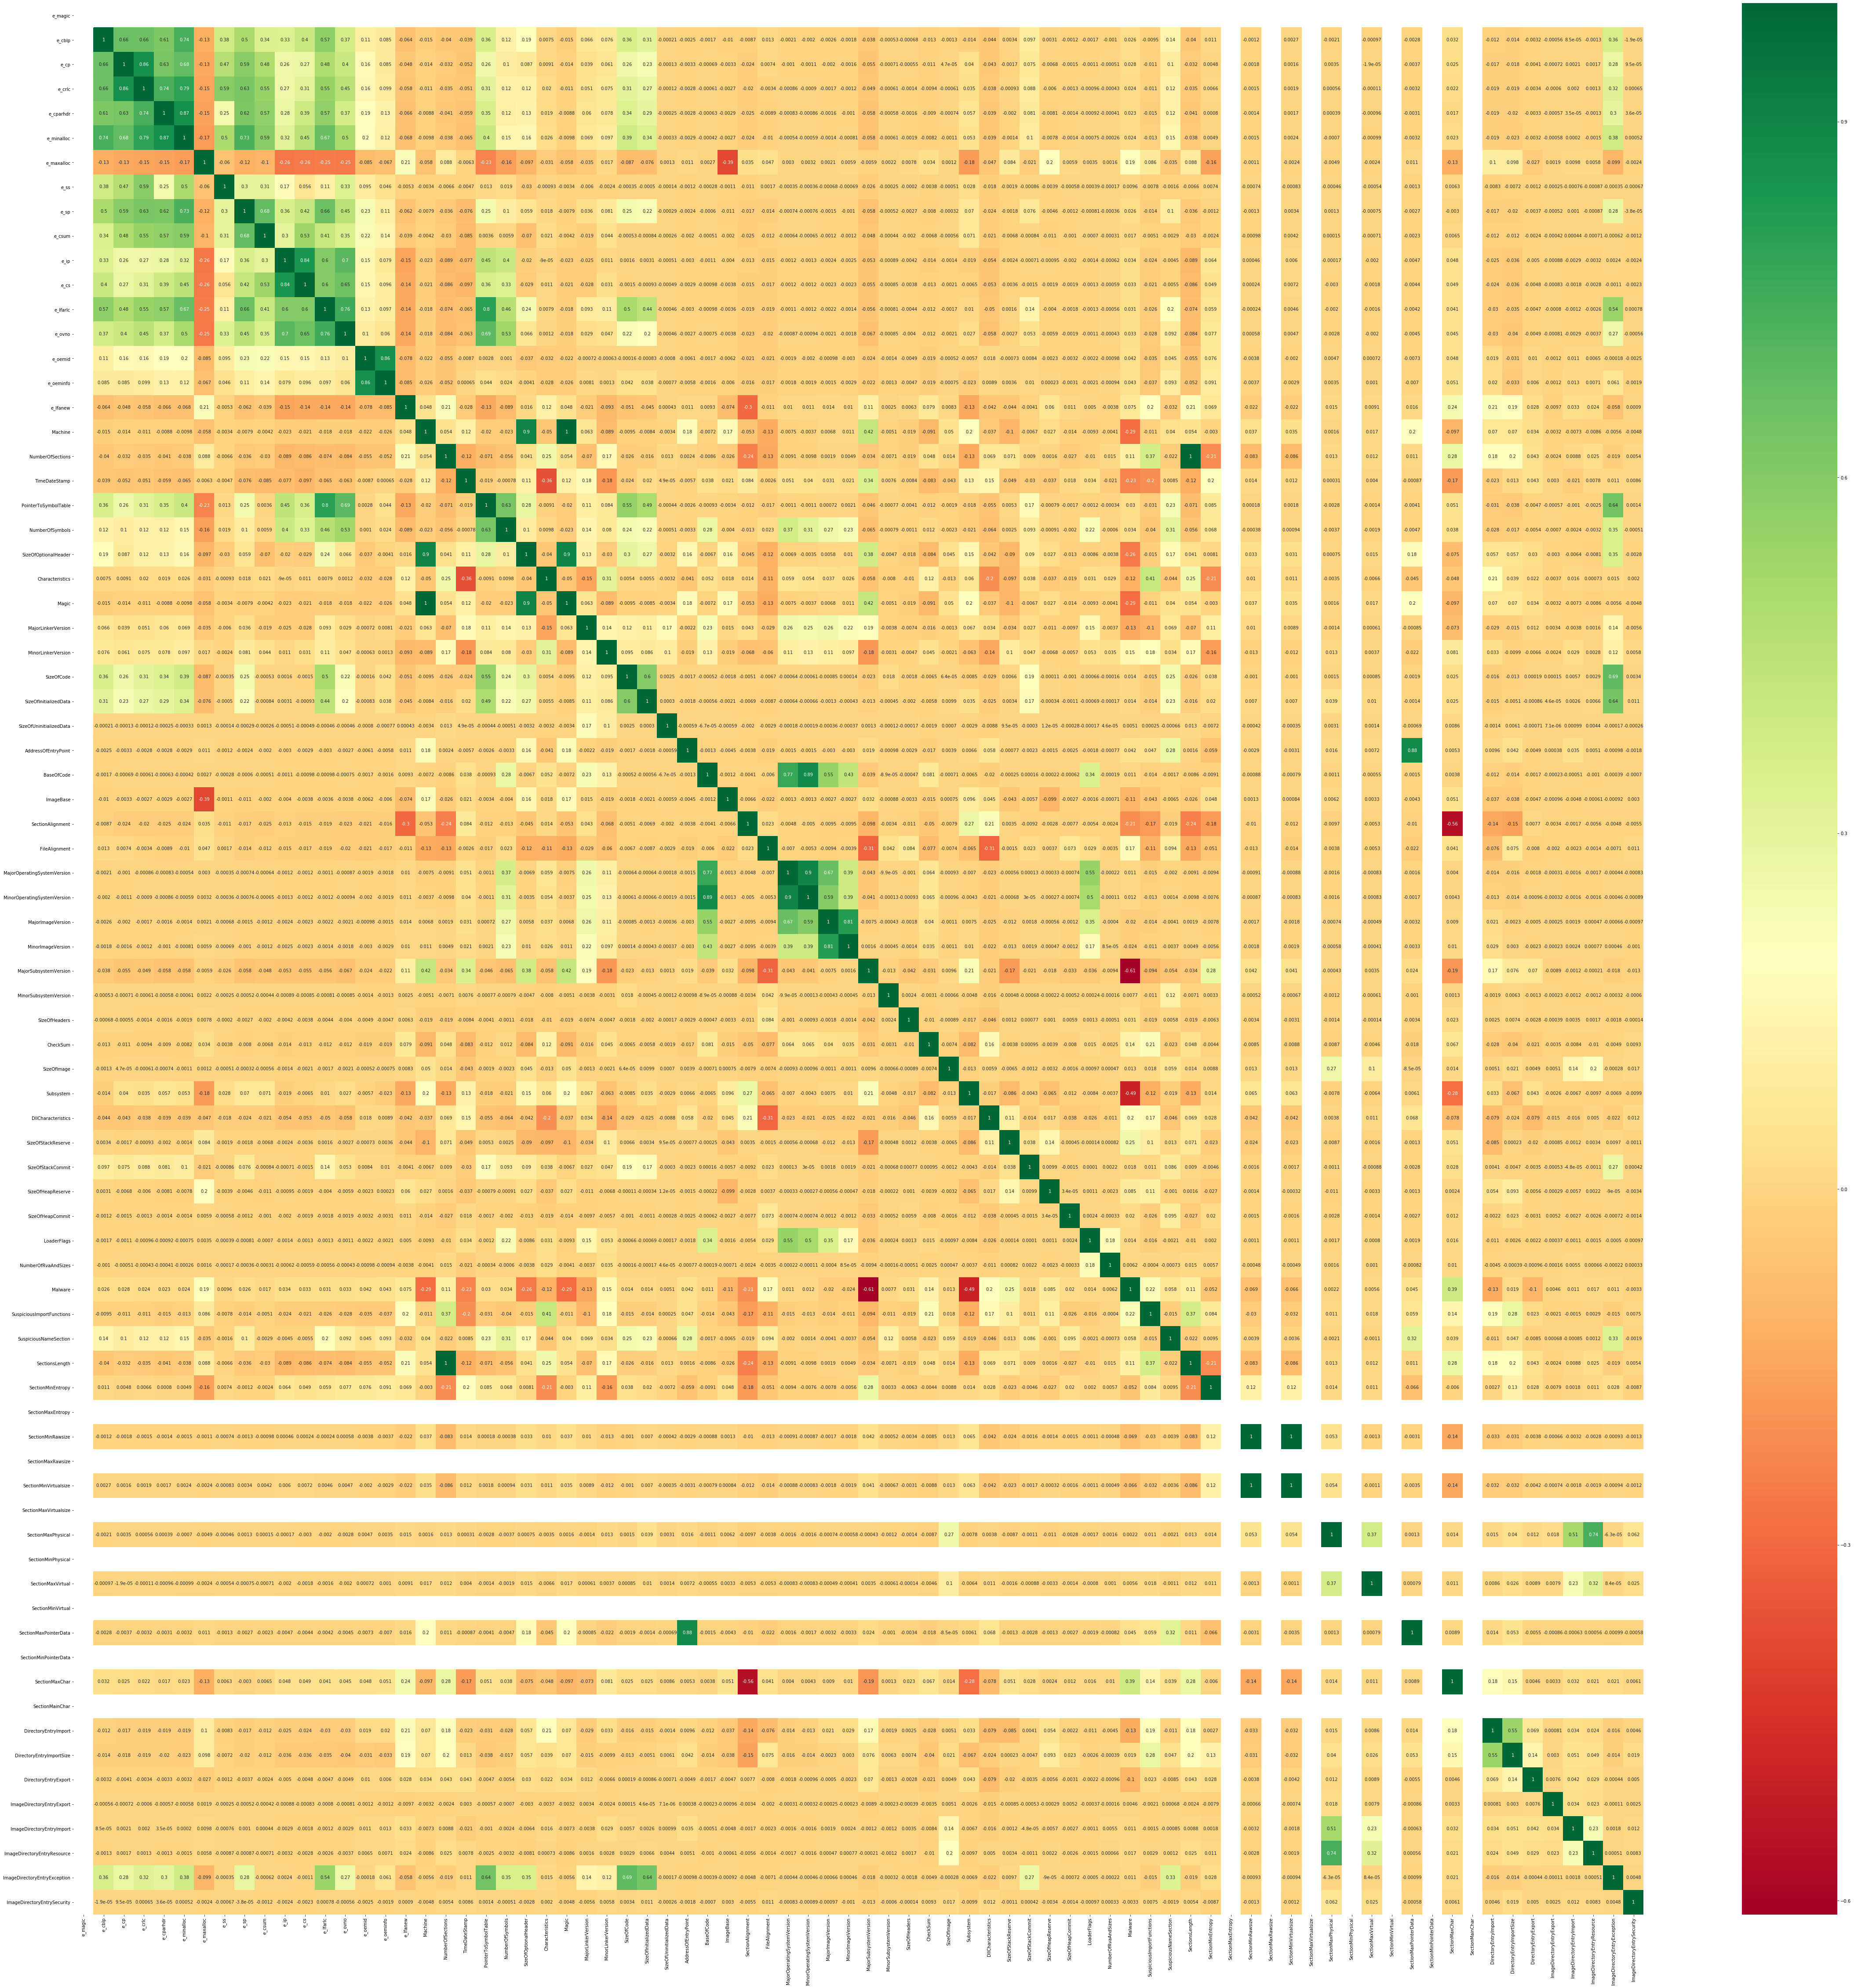

In [11]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(80,80))
#plot heat map
plt.savefig('heatmap.png')
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [12]:
cor = dataset.corr()
cor_target = abs(cor["Malware"])
relevant_features = cor_target[cor_target>0.1]
print(relevant_features.drop('Malware').keys())

Index(['e_maxalloc', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorSubsystemVersion',
       'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SuspiciousImportFunctions', 'SectionsLength', 'SectionMaxChar',
       'DirectoryEntryImport', 'DirectoryEntryExport'],
      dtype='object')


In [13]:
X.shape

(19611, 77)

e:\Users\rahul\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00000000e+00 4.11573539e-03 6.53013921e-04 1.58568467e-08
 3.40930409e-04 7.24935446e-03 9.14553403e-03 2.78607445e-05
 4.14632208e-04 1.62625947e-04 2.76690419e-04 8.45012122e-05
 1.97882433e-04 1.06786004e-03 2.26354950e-04 3.11995375e-04
 5.39495029e-03 3.80637849e-02 6.26740316e-03 1.94794905e-02
 5.35021649e-04 8.92430261e-04 7.42881283e-03 8.57084759e-02
 3.15946625e-02 2.24938049e-02 1.38573426e-02 3.38735994e-03
 4.82258499e-03 1.43117557e-03 3.51442932e-03 3.35483573e-03
 7.05669840e-02 9.72905301e-03 1.82760894e-02 5.94459134e-02
 5.69906016e-02 6.52174875e-03 6.98123386e-03 1.04104991e-01
 1.86341946e-02 4.81033567e-03 1.21590755e-02 4.31851339e-03
 8.89826740e-02 4.58183197e-02 4.54113711e-02 2.13400588e-03
 5.03778483e-03 2.90729209e-04 2.08566829e-09 3.71569284e-05
 2.19304194e-02 1.64872151e-03 8.70038060e-03 2.28231372e-02
 0.00000000e+00 4.39254815e-03 0.00000000e+00 2.57397218e-03
 0.00000000e+00 3.30417138e-03 0.00000000e+00 3.22545156e-03
 0.00000000e+00 4.819835

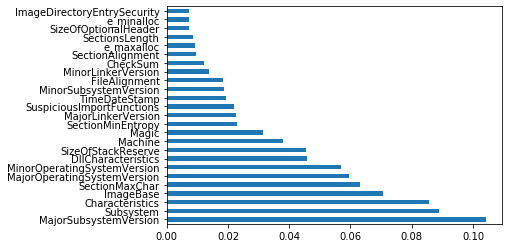

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_new,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=dataset.drop(['Name','Malware'], axis=1).columns)
feat_importances.nlargest(25).plot(kind='barh')
print((feat_importances.head()))
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier as RFC

# X2 = X_new[['e_maxalloc','SectionAlignment','FileAlignment','SuspiciousImportFunctions','MinorOperatingSystemVersion','SectionMinEntropy','MinorSubsystemVersion','Subsystem','DllCharacteristics','MajorSubsystemVersion','ImageBase','Characteristics']]

In [16]:
def filterdf(df):
    X2 = df[['e_maxalloc', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorSubsystemVersion',
       'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SuspiciousImportFunctions', 'SectionsLength', 'SectionMaxChar',
       'DirectoryEntryImport', 'DirectoryEntryExport']]
    return X2

In [17]:
model = RFC(n_estimators=100, random_state=0, 
                         oob_score = True,
                         max_depth = 16, 
                         max_features = 'sqrt')
model.fit(filterdf(X_new), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [18]:

print(np.shape(filterdf(X_new)))
print(np.shape(filterdf(X_test)))

(15688, 22)
(3923, 22)


In [19]:
model.score(filterdf(X_new),y_train)

0.9969403365629781

In [20]:
X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X_new.columns)
model.score(filterdf(X_test_new),y_test)

0.9936273260260005

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(filterdf(X_test_new))
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       965
           1       1.00      0.99      1.00      2958

    accuracy                           0.99      3923
   macro avg       0.99      0.99      0.99      3923
weighted avg       0.99      0.99      0.99      3923



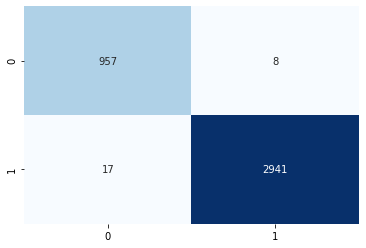

In [22]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [23]:
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scale', scaler), ('clf', model)])


e:\Users\rahul\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [24]:
test = pd.read_csv('dataset_test.csv', sep=',')

X_to_push = test
X_testing = test.drop(['Name'], axis=1)


clf = pipe
X_testing_scaled = clf.named_steps['scale'].transform(X_testing)
# X_testing_pca = clf.named_steps['pca'].transform(X_testing_scaled)
# print(type(X_testing_scaled))
X_testing_new = pd.DataFrame(X_testing_scaled, columns=X_testing.columns)

y_testing_pred = clf.named_steps['clf'].predict_proba(filterdf(X_testing_new))
pd.concat([X_to_push['Name'], pd.DataFrame(y_testing_pred) ], axis=1)


,Name,0,1
0,Skype-8.10.0.9.exe,1.000000,0.000000
1,vlc-3.0.2-win64.exe,0.820676,0.179324
2,stinger32.exe,0.540471,0.459529
3,SpotifyFullSetup.exe,0.800000,0.200000
4,uftp_english.exe,0.811324,0.188676
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,0.080841,0.919159
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0.760289,0.239711
7,reverse_shell.exe,0.470000,0.530000
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0.590359,0.409641
9,ScratchInstaller1.4.exe,0.039404,0.960596


In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
print("Train Score: "+str(knn.score(X_train,y_train)))
print("Test Score: "+str(knn.score(X_test,y_test)))

Train Score: 0.9885262621111678
Test Score: 0.9859801172572011


In [26]:
d2 = pd.read_csv('dataset_test.csv')
d2.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,Skype-8.10.0.9.exe,23117,80,2,0,4,15,65535,0,184,...,3221225536,0,11,122,0,0,102400,114688,0,53905336
1,vlc-3.0.2-win64.exe,23117,144,3,0,4,0,65535,0,184,...,3227517056,0,7,165,0,0,208896,430080,0,40201272
2,stinger32.exe,23117,64,1,0,2,0,65535,0,184,...,3758096608,0,1,2,7,36339712,36339976,36343808,0,16478208
3,SpotifyFullSetup.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,8,159,0,0,634448,679936,0,63220064
4,uftp_english.exe,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,4,92,0,0,38620,49152,0,35544576


In [27]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
mal_encoded=le.fit_transform(y)
print(mal_encoded)


[1 1 1 ... 0 0 0]


In [28]:
model1 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model1.fit(X,y)
J_test=d2.drop(['Name'], axis=1)
predicted= knn.predict_proba(J_test) 

# print(predicted)
pd.concat([d2['Name'],pd.DataFrame(predicted)],axis=1)

,Name,0,1
0,Skype-8.10.0.9.exe,1.00,0.00
1,vlc-3.0.2-win64.exe,1.00,0.00
2,stinger32.exe,0.50,0.50
3,SpotifyFullSetup.exe,1.00,0.00
4,uftp_english.exe,1.00,0.00
5,161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...,0.00,1.00
6,eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...,0.75,0.25
7,reverse_shell.exe,1.00,0.00
8,873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...,0.75,0.25
9,ScratchInstaller1.4.exe,0.25,0.75


In [29]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = knn.predict(X_test) 
print(classification_report(y_pred, y_test))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       993
           1       0.99      0.99      0.99      2930

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923



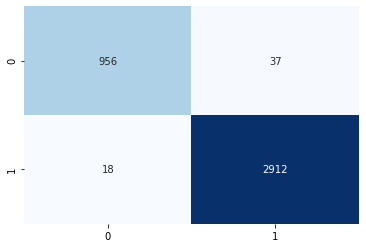

In [30]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [31]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(filterdf(X_new), y_train)
print("Training accuracy: "+str(gnb.score(filterdf(X_new),y_train)))

Training accuracy: 0.8899796022437532


In [32]:
y_pred = gnb.predict(filterdf(X_test_new))
print("Testing accuracy: "+str(gnb.score(filterdf(X_test_new),y_test)))

Testing accuracy: 0.8926841702778486


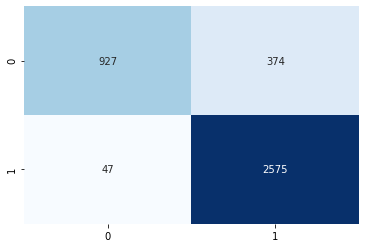

In [33]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(filterdf(X_new), y_train)
lr.score(filterdf(X_new), y_train)

e:\Users\rahul\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9602881183069862

In [35]:
print("Training accuracy: "+str(lr.score(filterdf(X_new), y_train)))

Training accuracy: 0.9602881183069862


In [36]:
y_pred = lr.predict(filterdf(X_test_new))
print("Testing accuracy: "+str(lr.score(filterdf(X_test_new),y_test)))

Testing accuracy: 0.961509049197043


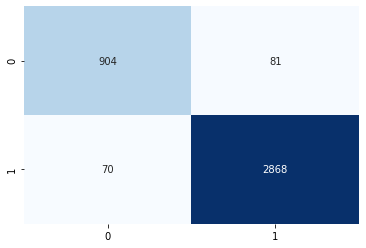

In [37]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(filterdf(X_new),y_train)
print("Train Score: "+str(knn.score(filterdf(X_new),y_train)))
print("Test Score: "+str(knn.score(filterdf(X_test_new),y_test)))

Train Score: 0.9852753697093319
Test Score: 0.9824114198317614


In [39]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(filterdf(X_new), y_train)
svc.score(filterdf(X_new),y_train)

e:\Users\rahul\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9592682304946456

In [40]:
print("Training accuracy: "+str(svc.score(filterdf(X_new),y_train)))

Training accuracy: 0.9592682304946456


In [41]:
y_pred = svc.predict(filterdf(X_test_new))
print("Testing accuracy: "+str(svc.score(filterdf(X_test_new),y_test)))

Testing accuracy: 0.962018863114963


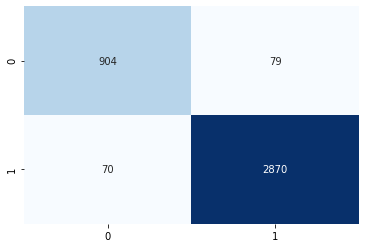

In [42]:
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)


In [43]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [44]:
estimator = model.estimators_[5]

In [45]:
estimator

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1537364731, splitter='best')

In [46]:
filterdf(dataset).columns

Index(['e_maxalloc', 'Machine', 'NumberOfSections', 'TimeDateStamp',
       'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorSubsystemVersion',
       'CheckSum', 'Subsystem', 'DllCharacteristics', 'SizeOfStackReserve',
       'SuspiciousImportFunctions', 'SectionsLength', 'SectionMaxChar',
       'DirectoryEntryImport', 'DirectoryEntryExport'],
      dtype='object')

In [47]:
import os
from sklearn.tree import export_graphviz
import six
import pydot
from sklearn import tree
dotfile = six.StringIO()
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = filterdf(dataset).columns ,
                class_names = ['Not Malware','Malware'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
(graph,) = pydot.graph_from_dot_file('tree.dot')
name = 'tree' 
graph.write_png(name+  '.png')
os.system('dot -Tpng tree.dot -o tree.png')


0